In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
city_data = []
city_data

[]

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
#Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | chokurdakh
Processing Record 2 of Set 13 | kousseri
Processing Record 3 of Set 13 | kapaa
Processing Record 4 of Set 13 | cape town
Processing Record 5 of Set 13 | dikson
Processing Record 6 of Set 13 | busselton
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | kahului
Processing Record 9 of Set 13 | puerto ayora
Processing Record 10 of Set 13 | gizo
Processing Record 11 of Set 13 | beringovskiy
Processing Record 12 of Set 13 | port hardy
Processing Record 13 of Set 13 | new norfolk
Processing Record 14 of Set 13 | roebourne
Processing Record 15 of Set 13 | butaritari
Processing Record 16 of Set 13 | colares
Processing Record 17 of Set 13 | vila velha
Processing Record 18 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 13 | katsuura
Processing Record 20 of Set 13 | buraydah
Processing Record 21 of Set 13 | terme
Processing Record 22 of Set 13 | santa rosa
Processing Record 23 of Set 13 | hindupu

Processing Record 37 of Set 16 | lagoa
Processing Record 38 of Set 16 | eyl
Processing Record 39 of Set 16 | limon
Processing Record 40 of Set 16 | karaton
Processing Record 41 of Set 16 | qaqortoq
Processing Record 42 of Set 16 | upernavik
Processing Record 43 of Set 16 | le moule
Processing Record 44 of Set 16 | moerai
Processing Record 45 of Set 16 | bethel
Processing Record 46 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 16 | potam
Processing Record 48 of Set 16 | pangnirtung
Processing Record 49 of Set 16 | manta
Processing Record 50 of Set 16 | alekseyevsk
Processing Record 1 of Set 17 | varzea grande
Processing Record 2 of Set 17 | port alfred
Processing Record 3 of Set 17 | ishigaki
Processing Record 4 of Set 17 | pevek
Processing Record 5 of Set 17 | hofn
Processing Record 6 of Set 17 | nanortalik
Processing Record 7 of Set 17 | aragarcas
Processing Record 8 of Set 17 | berlevag
Processing Record 9 of Set 17 | belushya guba
City not found. Skippi

Processing Record 20 of Set 20 | sambava
Processing Record 21 of Set 20 | zaraza
Processing Record 22 of Set 20 | nanton
Processing Record 23 of Set 20 | balabac
Processing Record 24 of Set 20 | saint-pierre
Processing Record 25 of Set 20 | mattru
Processing Record 26 of Set 20 | yinchuan
Processing Record 27 of Set 20 | puerto quijarro
Processing Record 28 of Set 20 | bud
Processing Record 29 of Set 20 | oranjestad
Processing Record 30 of Set 20 | quba
Processing Record 31 of Set 20 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 20 | cockburn town
Processing Record 33 of Set 20 | lavrentiya
Processing Record 34 of Set 20 | atar
Processing Record 35 of Set 20 | haibowan
City not found. Skipping...
Processing Record 36 of Set 20 | manzil tamim
City not found. Skipping...
Processing Record 37 of Set 20 | mitsamiouli
Processing Record 38 of Set 20 | xunchang
Processing Record 39 of Set 20 | salalah
Processing Record 40 of Set 20 | vaitape
Processing Record 41 of Set 20 

Processing Record 6 of Set 24 | yarmouth
Processing Record 7 of Set 24 | shuiji
Processing Record 8 of Set 24 | wetter
Processing Record 9 of Set 24 | roma
Processing Record 10 of Set 24 | solvychegodsk
Processing Record 11 of Set 24 | gobabis
Processing Record 12 of Set 24 | jumla
Processing Record 13 of Set 24 | utiroa
City not found. Skipping...
Processing Record 14 of Set 24 | kolokani
Processing Record 15 of Set 24 | frontera
Processing Record 16 of Set 24 | ust-tsilma
Processing Record 17 of Set 24 | helong
Processing Record 18 of Set 24 | maraa
Processing Record 19 of Set 24 | suntar
Processing Record 20 of Set 24 | asau
Processing Record 21 of Set 24 | meyungs
City not found. Skipping...
Processing Record 22 of Set 24 | ures
Processing Record 23 of Set 24 | memaliaj
Processing Record 24 of Set 24 | zychlin
Processing Record 25 of Set 24 | sorvag
City not found. Skipping...
Processing Record 26 of Set 24 | sabha
Processing Record 27 of Set 24 | indramayu
Processing Record 28 of 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,-8.03,100,75,2.24,RU,2021-10-18 05:14:30
1,Kousseri,12.0769,15.0306,80.19,66,63,5.73,CM,2021-10-18 05:14:30
2,Kapaa,22.0752,-159.3190,78.78,81,20,1.99,US,2021-10-18 05:09:32
3,Cape Town,-33.9258,18.4232,56.10,70,0,3.00,ZA,2021-10-18 05:08:58
4,Dikson,73.5069,80.5464,30.90,99,100,6.04,RU,2021-10-18 05:08:45
5,Busselton,-33.6500,115.3333,72.09,68,22,14.41,AU,2021-10-18 05:14:31
6,Punta Arenas,-53.1500,-70.9167,48.31,76,0,12.66,CL,2021-10-18 05:13:22
7,Kahului,20.8947,-156.4700,76.84,82,20,16.11,US,2021-10-18 05:13:19
8,Puerto Ayora,-0.7393,-90.3518,70.56,90,100,1.99,EC,2021-10-18 05:14:32
9,Gizo,-8.1030,156.8419,84.97,67,92,3.27,SB,2021-10-18 05:08:56


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng" , "Max Temp" , "Humidity" , "Cloudiness" , "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-10-18 05:14:30,70.6333,147.9167,-8.03,100,75,2.24
1,Kousseri,CM,2021-10-18 05:14:30,12.0769,15.0306,80.19,66,63,5.73
2,Kapaa,US,2021-10-18 05:09:32,22.0752,-159.3190,78.78,81,20,1.99
3,Cape Town,ZA,2021-10-18 05:08:58,-33.9258,18.4232,56.10,70,0,3.00
4,Dikson,RU,2021-10-18 05:08:45,73.5069,80.5464,30.90,99,100,6.04
...,...,...,...,...,...,...,...,...,...
572,Nizhniy Baskunchak,RU,2021-10-18 05:17:54,48.2198,46.8311,56.37,63,93,2.66
573,Abashiri,JP,2021-10-18 05:08:34,44.0213,144.2697,49.95,51,78,15.39
574,Halifax,CA,2021-10-18 05:16:22,44.6453,-63.5724,57.09,96,100,1.01
575,Silifke,TR,2021-10-18 05:17:55,36.3778,33.9344,68.58,48,0,6.33


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
#Test
#index13 = city_data_df.loc[13]
#index13

In [20]:
#try before solution
#city_data_df["Lat"] >= 0

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

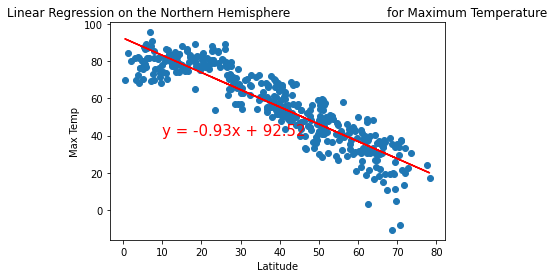

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



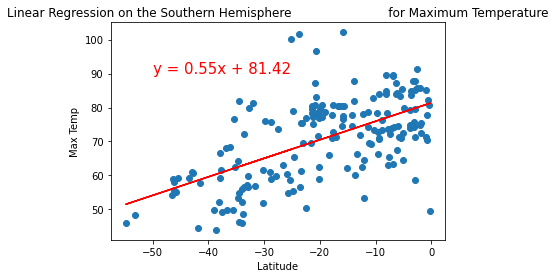

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))



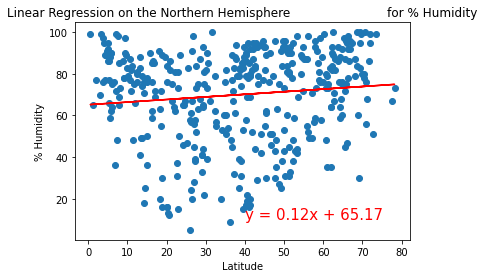

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

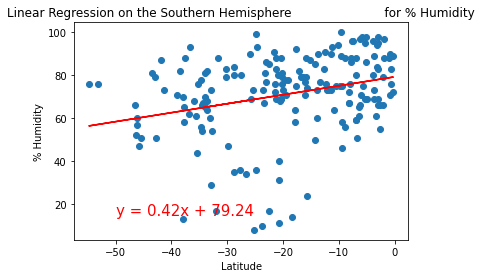

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

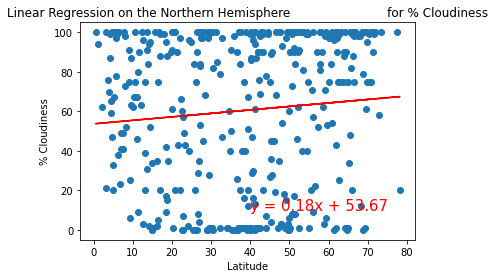

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

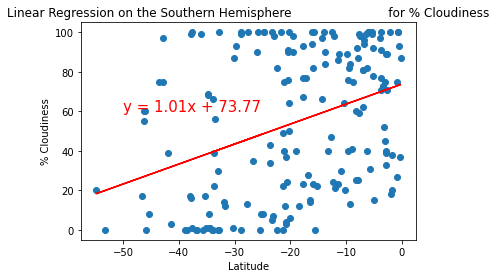

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

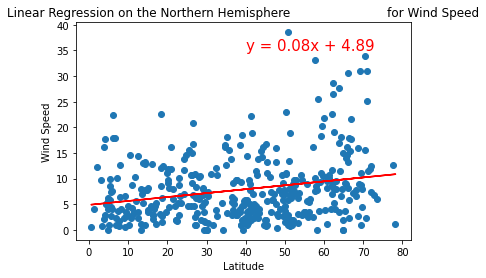

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

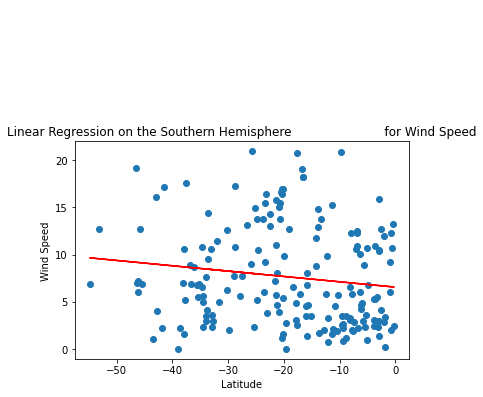

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed',(-50,35))